### ***Import Libraries***

-----

In [2]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import tensorflow as tf

In [1]:
pip install tensorflow==2.15

In [3]:
print(tf.__version__)

2.15.0


Take images from url

In [4]:
import requests
urls = ['https://images.pexels.com/photos/8305454/pexels-photo-8305454.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1',
        'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSzajEianBJjl_Rn8S8PUm6kPxgiKY9I1BvEQ&s']
for index, url in enumerate(urls):
  response = requests.get(url)
  filename = 'img-test-' + str(index+1) + '.jpg' 
  file = open(filename, "wb")
  file.write(response.content)
  file.close()

Load the best model

In [5]:
model = load_model("model3.h5")

Let's Predict and identify the class of each images

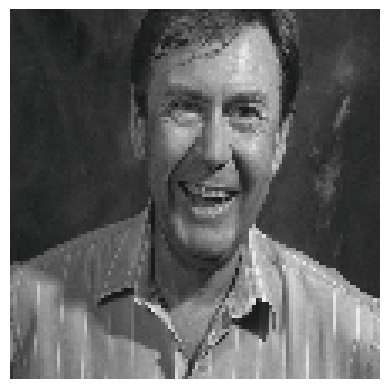

1/1 [==============================] - 12s 12s/step
Prediction result is:  angry



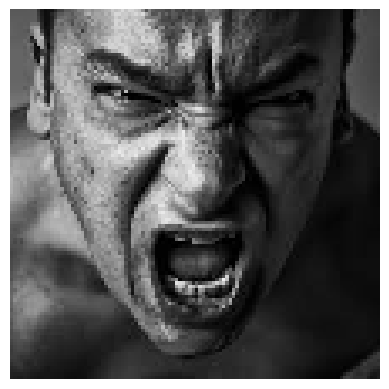

1/1 [==============================] - 0s 232ms/step
Prediction result is:  angry



In [6]:
# Test Images
img_paths = ['img-test-1.jpg', 'img-test-2.jpg']
input_size = (110, 110)  # Example size, adjust as needed
class_names = ["angry", "disgusted", "fearful", "happy", "neutral", "sad", "surprised"]

for filename in img_paths:
    img = image.load_img(filename, target_size=input_size)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_batch = img_batch / 255.0

    prediction_inf = model.predict(img_batch)
    result_max_proba = prediction_inf.argmax(axis=-1)[0]
    result_class = class_names[result_max_proba]
    
    print('Prediction result is: ', result_class)
    print('')